In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv("iris.csv")
df=df.head()
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
dum_df = pd.get_dummies(df,drop_first=True)
dum_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_versicolor
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [8]:
X = dum_df.drop('Species_versicolor', axis=1)
y = dum_df['Species_versicolor']

In [11]:


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)


In [12]:

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))

[[15  0]
 [ 0 15]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
print(accuracy_score(y_test, y_pred))

1.0


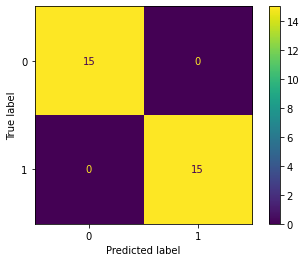

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gaussian, X_test, y_test)
plt.show() 


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
probs = gaussian.predict_proba(X_test)
y_pred_prob = probs[:,1]
probs

array([[1.00000000e+000, 6.64393741e-019],
       [1.00000000e+000, 7.17517372e-011],
       [5.24623637e-123, 1.00000000e+000],
       [1.00000000e+000, 1.58035191e-011],
       [1.00000000e+000, 1.93056900e-019],
       [1.53146606e-087, 1.00000000e+000],
       [1.05623199e-113, 1.00000000e+000],
       [9.57568929e-130, 1.00000000e+000],
       [1.50014147e-104, 1.00000000e+000],
       [1.00000000e+000, 3.32169453e-016],
       [2.17306179e-126, 1.00000000e+000],
       [1.90185268e-043, 1.00000000e+000],
       [1.00000000e+000, 1.76750742e-018],
       [1.00000000e+000, 1.01131834e-018],
       [7.23582757e-132, 1.00000000e+000],
       [2.64669022e-123, 1.00000000e+000],
       [1.00000000e+000, 1.55966916e-015],
       [1.00000000e+000, 7.11920724e-019],
       [6.32667658e-117, 1.00000000e+000],
       [1.00000000e+000, 5.51793476e-019],
       [1.00000000e+000, 8.66733111e-019],
       [1.00000000e+000, 5.48623345e-020],
       [1.34274676e-123, 1.00000000e+000],
       [1.1

In [19]:
y_pred_prob

array([6.64393741e-19, 7.17517372e-11, 1.00000000e+00, 1.58035191e-11,
       1.93056900e-19, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 3.32169453e-16, 1.00000000e+00, 1.00000000e+00,
       1.76750742e-18, 1.01131834e-18, 1.00000000e+00, 1.00000000e+00,
       1.55966916e-15, 7.11920724e-19, 1.00000000e+00, 5.51793476e-19,
       8.66733111e-19, 5.48623345e-20, 1.00000000e+00, 1.00000000e+00,
       3.08524564e-19, 1.04596595e-20, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.28777428e-18])

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

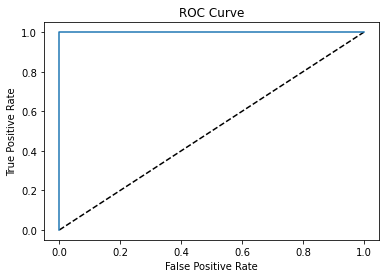

In [21]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [22]:
roc_auc_score(y_test, y_pred_prob)

1.0